In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-customer-dummy/data_customer_dummy.csv


In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "data_customer_dummy.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "andysarbini/data-customer-dummy",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

First 5 records:   Customer_ID  Usia  Pendapatan_Tahunan  Jumlah_Pinjaman  Lama_Bergabung  \
0   CUST_0001    59                 253              712               6   
1   CUST_0002    49                 254              688              11   
2   CUST_0003    35                 414              204              13   
3   CUST_0004    63                 432              539              14   
4   CUST_0005    28                 155              435               3   

   Skor_Kredit  
0          673  
1          364  
2          445  
3          523  
4          538  


/tmp/ipykernel_13/315568917.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

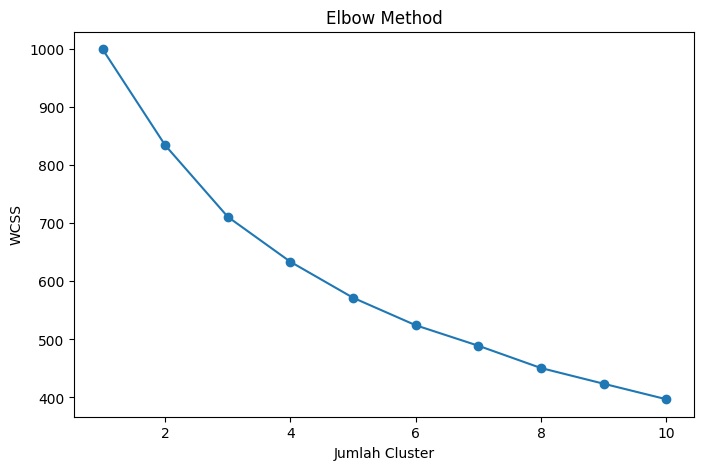

In [3]:
# Preprocessing: pilih fitur yang relevan
features = ['Usia', 'Pendapatan_Tahunan', 'Jumlah_Pinjaman', 'Lama_Bergabung', 'Skor_Kredit']
X = df[features]

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method untuk mencari jumlah cluster optimal
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()


In [4]:
# Setelah melihat plot, misalnya pilih 4 cluster
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Tambahkan hasil cluster ke data asli
df['Cluster'] = clusters

# Lihat hasil segmentasi
print(df.groupby('Cluster')[features].mean())

              Usia  Pendapatan_Tahunan  Jumlah_Pinjaman  Lama_Bergabung  \
Cluster                                                                   
0        53.245283          176.566038       558.792453        9.603774   
1        31.851852          322.425926       642.111111        6.018519   
2        39.840909          316.772727       230.159091        7.477273   
3        47.938776          274.979592       259.795918        6.428571   

         Skor_Kredit  
Cluster               
0         494.037736  
1         577.277778  
2         423.022727  
3         740.183673  


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Visualiasi Cluster

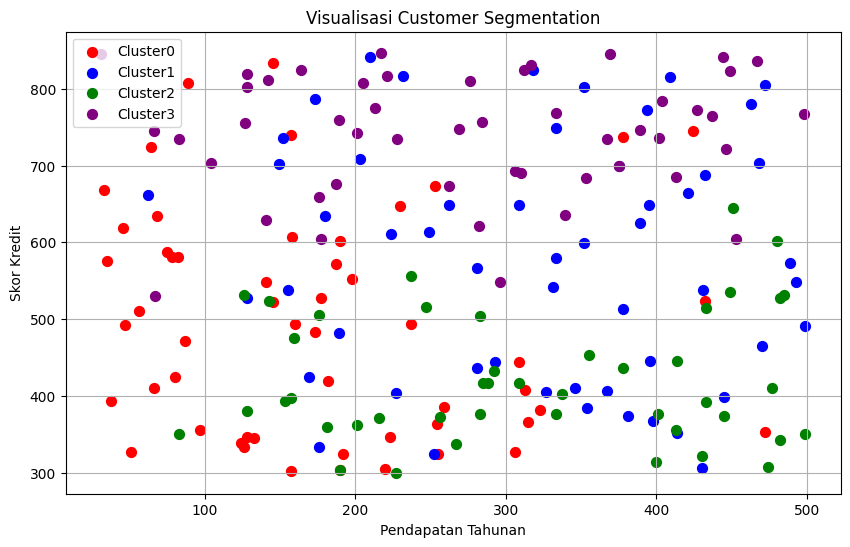

In [5]:
import matplotlib.pyplot as plt

# Plot cluster berdasarkan dua fitur: Pendapatan_Tahunan vs Skor_Kredit
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'purple']

for cluster in range(4):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Pendapatan_Tahunan'], cluster_data['Skor_Kredit'], s=50, c=colors[cluster], label=f'Cluster{cluster}')

plt.title('Visualisasi Customer Segmentation')
plt.xlabel('Pendapatan Tahunan')
plt.ylabel('Skor Kredit')
plt.legend()
plt.grid(True)
plt.show()
    

# PCA Visualisasi

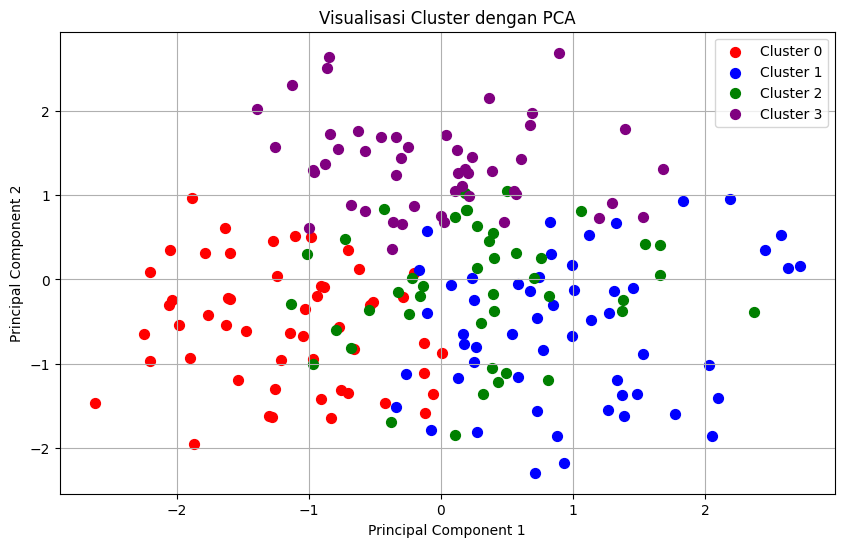

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA - Reduksi ke 2 dimensi
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Membuat DataFrame hasil PCA
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

# Plot hasil PCA
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'purple']

for cluster in range(4):
    cluster_points = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_points['PC1'], cluster_points['PC2'], s=50, c=colors[cluster], label=f'Cluster {cluster}')

plt.title('Visualisasi Cluster dengan PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Perhitungan Silhouette Score

In [7]:
from sklearn.metrics import silhouette_score

# Hitung Silhouette Score
sil_score = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.1705


# Mencari jumlah cluster terbaik berdasarkan Silhouette Score

Jumlah Cluster: 2, Silhouette Score: 0.1607
Jumlah Cluster: 3, Silhouette Score: 0.1676
Jumlah Cluster: 4, Silhouette Score: 0.1705
Jumlah Cluster: 5, Silhouette Score: 0.1714
Jumlah Cluster: 6, Silhouette Score: 0.1727
Jumlah Cluster: 7, Silhouette Score: 0.1753
Jumlah Cluster: 8, Silhouette Score: 0.1848
Jumlah Cluster: 9, Silhouette Score: 0.1864
Jumlah Cluster: 10, Silhouette Score: 0.2000


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

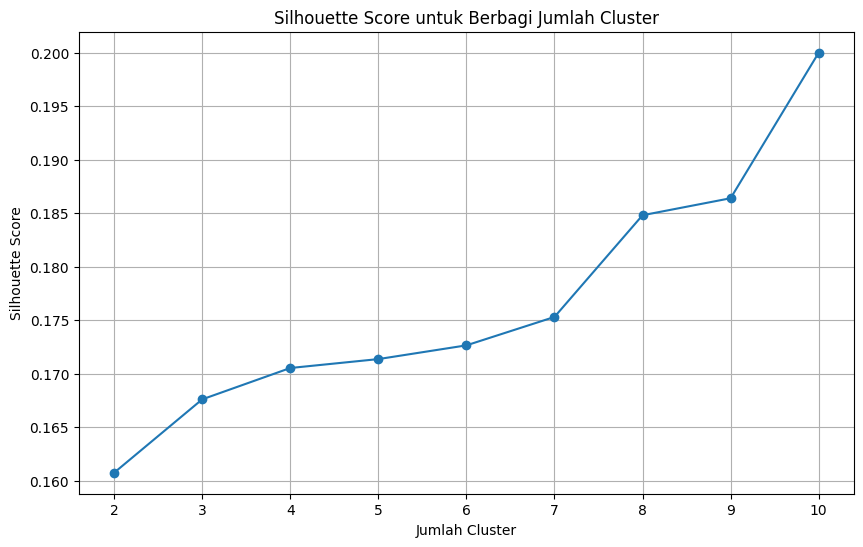

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Range jumlah cluster yang akan diuji
range_n_clusters = list(range(2, 11))

silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(sil_score)
    print(f"Jumlah Cluster: {n_clusters}, Silhouette Score: {sil_score:.4f}")

# Plot hasilnya
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score untuk Berbagi Jumlah Cluster')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

# Filter berdasarkan nilai Cluster

In [9]:
# Ambil semua customer di cluster 0
cluster_0 = df[df['Cluster'] == 0]

# Ambil semua customer di cluster 1
cluster_1 = df[df['Cluster'] == 1]

# Ambil semua customer di cluster 2
cluster_2 = df[df['Cluster'] == 2]

# Ambil semua customer di cluster 3
cluster_3 = df[df['Cluster'] == 3]

# Contoh: simpan masing-masing cluster ke file csv
df.to_csv('/kaggle/working/customers_with_cluster.csv', index=False)